# A1

Can the model accurately predict future negative and positive reviews?

# A2

The objective is to build a neural network model to train and test a dataset for postive and negative reviews through text classification. The goal is to have a model that can read new data and accurately predict postive and negative reviews

# A3

TensorFlow and Kera libraries are capable of performing text classification, the type of neural network that performs this task is a recurrent neural network (RNN).

# B1

In [1]:
#import relevant packages for data cleaning
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
#Create dataframe
#input of the dataset into dataframe separating into 3 features, 'text': reviews, 'labels': sentiment score, and 'source': source of dataset 

amazon = open('amazon_cells_labelled.txt').read()

a_labels, a_texts = [],[]
for i, line in enumerate(amazon.split('\n')):
    content = line.split('\t')
    if len(content) > 1:
        a_texts.append(content[0])
        a_labels.append(content[1])   
        
df_a = pd.DataFrame()
df_a['label'] = a_labels
df_a['text'] = a_texts
df_a['source'] = 'amazon'

imdb = open('imdb_labelled.txt').read()

i_labels, i_texts = [],[]
for i, line in enumerate(imdb.split('\n')):
    content = line.split('\t')
    if len(content) > 1:
        i_texts.append(content[0])
        i_labels.append(content[1])
        
df_i = pd.DataFrame()
df_i['label'] = i_labels
df_i['text'] = i_texts
df_i['source'] = 'imdb'

yelp = open('yelp_labelled.txt').read()

y_labels, y_texts = [],[]
for i, line in enumerate(yelp.split('\n')):
    content = line.split('\t')
    if len(content) > 1:
        y_texts.append(content[0])
        y_labels.append(content[1])
        
df_y = pd.DataFrame()
df_y['label'] = y_labels
df_y['text'] = y_texts
df_y['source'] = 'yelp'

In [3]:
#displaying the 3 datasets
display(df_a.head())
display(df_a.shape)
display(df_i.head())
display(df_i.shape)
display(df_y.head())
display(df_y.shape)

,label,text,source
0,0,So there is no way for me to plug it in here i...,amazon
1,1,"Good case, Excellent value.",amazon
2,1,Great for the jawbone.,amazon
3,0,Tied to charger for conversations lasting more...,amazon
4,1,The mic is great.,amazon


(1000, 3)

,label,text,source
0,0,"A very, very, very slow-moving, aimless movie ...",imdb
1,0,Not sure who was more lost - the flat characte...,imdb
2,0,Attempting artiness with black & white and cle...,imdb
3,0,Very little music or anything to speak of.,imdb
4,1,The best scene in the movie was when Gerardo i...,imdb


(1000, 3)

,label,text,source
0,1,Wow... Loved this place.,yelp
1,0,Crust is not good.,yelp
2,0,Not tasty and the texture was just nasty.,yelp
3,1,Stopped by during the late May bank holiday of...,yelp
4,1,The selection on the menu was great and so wer...,yelp


(1000, 3)

In [4]:
#concatinating the 3 datasets into 1
df = pd.concat([df_a, df_i, df_y], ignore_index=True)
df.label = df.label.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3000 non-null   int32 
 1   text    3000 non-null   object
 2   source  3000 non-null   object
dtypes: int32(1), object(2)
memory usage: 58.7+ KB


In [5]:
df

,label,text,source
0,0,So there is no way for me to plug it in here i...,amazon
1,1,"Good case, Excellent value.",amazon
2,1,Great for the jawbone.,amazon
3,0,Tied to charger for conversations lasting more...,amazon
4,1,The mic is great.,amazon
...,...,...,...
2995,0,I think food should have flavor and texture an...,yelp
2996,0,Appetite instantly gone.,yelp
2997,0,Overall I was not impressed and would not go b...,yelp
2998,0,"The whole experience was underwhelming, and I ...",yelp


In [6]:
# explore the descriptive features
import string
df['chars'] = df.text.apply(len)
df['words'] = df.text.apply(lambda x: len(x.split()))
df['avg_wlen'] = df['chars']/ df['words']
df['puncs'] = df.text.apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
df['uppers'] = df.text.apply(lambda x: len([word for word in x.split() if word.isupper]))
df['titles'] = df.text.apply(lambda x: len([word for word in x.split() if word.istitle]))
df.head()

,label,text,source,chars,words,avg_wlen,puncs,uppers,titles
0,0,So there is no way for me to plug it in here i...,amazon,82,21,3.904762,1,21,21
1,1,"Good case, Excellent value.",amazon,27,4,6.750000,2,4,4
2,1,Great for the jawbone.,amazon,22,4,5.500000,1,4,4
3,0,Tied to charger for conversations lasting more...,amazon,79,11,7.181818,3,11,11
4,1,The mic is great.,amazon,17,4,4.250000,1,4,4


In [7]:
df['text'].str.len()

0        82
1        27
2        22
3        79
4        17
       ... 
2995     66
2996     24
2997     50
2998     91
2999    134
Name: text, Length: 3000, dtype: int64

In [8]:
df['text'].value_counts()

I would not recommend this place.                                                                                 2
Excellent product for the price.                                                                                  2
Not recommended.                                                                                                  2
Does not fit.                                                                                                     2
Works great!.                                                                                                     2
                                                                                                                 ..
The acting is beyond abysmal.                                                                                     1
Returned 8 hours later.                                                                                           1
If you want a movie that's not gross but gives you some chills, this is 

In [9]:
df['text'].unique()

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case, Excellent value.', 'Great for the jawbone.', ...,
       'Overall I was not impressed and would not go back.',
       "The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",
       "Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."],
      dtype=object)

In [10]:
print(min(df['text'].str.len()))
print(max(df['text'].str.len()))

7
479


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
count_vectorize = CountVectorizer()

In [13]:
feature_vector_df = count_vectorize.fit(df.text)

In [14]:
features_df = feature_vector_df.get_feature_names()

In [15]:
print('df total number of unique words:', len(features_df))

df total number of unique words: 5159


In [16]:
import random

In [17]:
random.sample(features_df, 10)

['buldogis',
 'throwback',
 'painfully',
 'bob',
 'sven',
 'retreat',
 'recent',
 'sins',
 'directing',
 'palm']

In [18]:
feature_vector_df_transform = count_vectorize.transform(df.text)

In [19]:
type(feature_vector_df_transform)

scipy.sparse.csr.csr_matrix

In [20]:
feature_vector_df_transform.getnnz()

31580

In [21]:
print("Density of the matrix: ", feature_vector_df_transform.getnnz()*100/(feature_vector_df_transform.shape[0]*feature_vector_df_transform.shape[1]))

Density of the matrix:  0.20404471150739809


In [22]:
train_df = pd.DataFrame(feature_vector_df_transform.todense())

In [23]:
train_df.columns = features_df

In [24]:
train_df[0:1]

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.text[0:1]

0    So there is no way for me to plug it in here i...
Name: text, dtype: object

In [26]:
features_count = np.sum(feature_vector_df_transform.toarray(), axis=0)

In [27]:
features_count_df = pd.DataFrame(dict(features_df=features_df, counts= features_count))

(array([5.112e+03, 2.700e+01, 8.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <BarContainer object of 10 artists>)

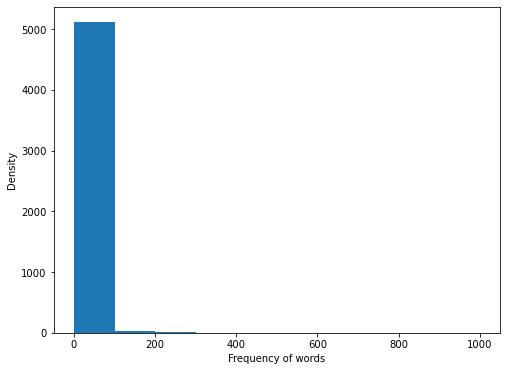

In [28]:
plt.figure(figsize=(8,6))
plt.xlabel('Frequency of words')
plt.ylabel('Density')
plt.hist(features_count_df.counts, bins=10, range=(0,1000))

In [29]:
len(features_count_df[features_count_df.counts==1])

2922

In [30]:
count_vectorizer = CountVectorizer(max_features=3000)
feature_vector = count_vectorizer.fit(df.text)
features = feature_vector.get_feature_names()
train_ds_features = count_vectorizer.transform(df.text)
features_counts = np.sum(train_ds_features.toarray(),axis=0)
features_counts = pd.DataFrame(dict(features= features, counts = features_counts))
features_counts.sort_values('counts', ascending=False)[0:15]

,features,counts
2377,the,1953
85,and,1138
1036,it,789
1033,is,753
2455,to,670
2404,this,643
1334,of,624
2814,was,571
1005,in,400
801,for,336


# removing stop words that do not provide significant insights. 
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
print('few stop words:', list(my_stop_words)[0:400])

<AxesSubplot:xlabel='label', ylabel='awesome'>

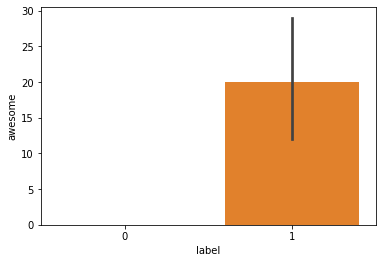

In [31]:
train_df = pd.DataFrame(train_ds_features.todense())
train_df.columns=features
train_df['label']=df.label
sns.barplot(x='label',y='awesome',data=train_df, estimator=sum)

<AxesSubplot:xlabel='label', ylabel='hate'>

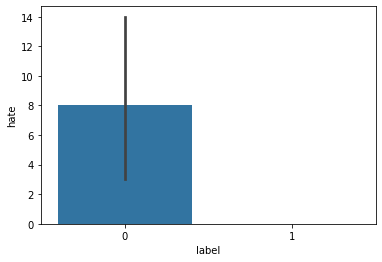

In [32]:
train_df = pd.DataFrame(train_ds_features.todense())
train_df.columns=features
train_df['label']=df.label
sns.barplot(x='label',y='hate',data=train_df, estimator=sum)

In [33]:
df

,label,text,source,chars,words,avg_wlen,puncs,uppers,titles
0,0,So there is no way for me to plug it in here i...,amazon,82,21,3.904762,1,21,21
1,1,"Good case, Excellent value.",amazon,27,4,6.750000,2,4,4
2,1,Great for the jawbone.,amazon,22,4,5.500000,1,4,4
3,0,Tied to charger for conversations lasting more...,amazon,79,11,7.181818,3,11,11
4,1,The mic is great.,amazon,17,4,4.250000,1,4,4
...,...,...,...,...,...,...,...,...,...
2995,0,I think food should have flavor and texture an...,yelp,66,12,5.500000,1,12,12
2996,0,Appetite instantly gone.,yelp,24,3,8.000000,1,3,3
2997,0,Overall I was not impressed and would not go b...,yelp,50,10,5.000000,1,10,10
2998,0,"The whole experience was underwhelming, and I ...",yelp,91,16,5.687500,3,16,16


In [34]:
#Review descriptive statistics of the texts
display(df.groupby(['source', 'label']).describe().loc[:,(slice(None),['mean', 'std'])].reset_index())
display(df.groupby(['source', 'label']).describe().loc[:,(slice(None),['min', 'max'])].reset_index())

source label   chars              words             avg_wlen            \
                   mean        std    mean        std      mean       std   
0  amazon     0  56.824  34.022464  10.578   6.578028  5.653474  1.262250   
1  amazon     1  53.628  35.234764   9.914   6.785772  5.670933  1.113802   
2    imdb     0  77.104  50.901504  13.580   9.037863  5.814498  0.941015   
3    imdb     1  87.466  60.831157  15.128  10.102859  5.826946  0.992992   
4    yelp     0  60.752  34.226443  11.498   6.611916  5.401394  0.896878   
5    yelp     1  55.888  30.232490  10.290   5.831459  5.606887  0.951414   

   puncs            uppers             titles             
    mean       std    mean        std    mean        std  
0  2.002  1.509488  10.578   6.578028  10.578   6.578028  
1  1.842  1.296301   9.914   6.785772   9.914   6.785772  
2  2.494  1.954893  13.580   9.037863  13.580   9.037863  
3  2.650  2.282525  15.128  10.102859  15.128  10.102859  
4  2.000  1.424098  11.498   6.611916  11.498   6.611916  
5  1.930  1.658494  10.290   5.831459  10.290   5.831459

source label chars        words        avg_wlen       puncs       uppers  \
                  min    max   min   max       min   max   min   max    min   
0  amazon     0  11.0  149.0   1.0  30.0  3.857143  14.0   0.0  11.0    1.0   
1  amazon     1  11.0  148.0   1.0  30.0  3.166667  13.0   0.0   9.0    1.0   
2    imdb     0   8.0  321.0   1.0  56.0  4.181818  11.5   1.0  14.0    1.0   
3    imdb     1   7.0  479.0   1.0  71.0  3.200000  12.0   0.0  18.0    1.0   
4    yelp     0  11.0  149.0   2.0  32.0  3.666667  12.5   0.0  11.0    2.0   
5    yelp     1  11.0  148.0   1.0  32.0  3.666667  11.0   0.0  19.0    1.0   

        titles        
    max    min   max  
0  30.0    1.0  30.0  
1  30.0    1.0  30.0  
2  56.0    1.0  56.0  
3  71.0    1.0  71.0  
4  32.0    2.0  32.0  
5  32.0    1.0  32.0

In [35]:
df

,label,text,source,chars,words,avg_wlen,puncs,uppers,titles
0,0,So there is no way for me to plug it in here i...,amazon,82,21,3.904762,1,21,21
1,1,"Good case, Excellent value.",amazon,27,4,6.750000,2,4,4
2,1,Great for the jawbone.,amazon,22,4,5.500000,1,4,4
3,0,Tied to charger for conversations lasting more...,amazon,79,11,7.181818,3,11,11
4,1,The mic is great.,amazon,17,4,4.250000,1,4,4
...,...,...,...,...,...,...,...,...,...
2995,0,I think food should have flavor and texture an...,yelp,66,12,5.500000,1,12,12
2996,0,Appetite instantly gone.,yelp,24,3,8.000000,1,3,3
2997,0,Overall I was not impressed and would not go b...,yelp,50,10,5.000000,1,10,10
2998,0,"The whole experience was underwhelming, and I ...",yelp,91,16,5.687500,3,16,16


After performing the exploratory analysis, unusual characters that were non-English were present.
After performing a statistical analysis on the text, a max and min length of words was able to be determined.
A proposed word embedding length could be the word max at 71 words based on the statistical justification.

# B2

The goal for tokenization is to prepare the text data for machine learning. It can clean the text by removing stopwords, puncutations. it characterizes words to a unique token to be classified by splitting the sentence into indiviual words.

In [36]:
# Splitting the words into tokens which turns the string into lists
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

i=0
df['clean_text'] = ''
for row in df.text:
    # add spaces to prevent word merging
    row = row.replace('.','. ', row.count('.')).replace(',', ', ', row.count(','))
    # tokenize words from the sentence inorder to have each word represent individually
    tokens = word_tokenize(row)
    # lowercase all words
    tokens = [token.lower() for token in tokens]
    # remove puncuations
    table = str.maketrans('', '', string.punctuation)
    # remove numeric tokens
    words = [token.translate(table) for token in tokens]
    # filter stopwords
    words = [word for word in words if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    df['clean_text'][i] = ' '.join(words)
    i += 1
df.clean_text = df.source + ' ' + df.clean_text
df.head()

<ipython-input-36-265c12e4f2e9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'][i] = ' '.join(words)


,label,text,source,chars,words,avg_wlen,puncs,uppers,titles,clean_text
0,0,So there is no way for me to plug it in here i...,amazon,82,21,3.904762,1,21,21,amazon way plug us unless go converter
1,1,"Good case, Excellent value.",amazon,27,4,6.750000,2,4,4,amazon good case excellent value
2,1,Great for the jawbone.,amazon,22,4,5.500000,1,4,4,amazon great jawbone
3,0,Tied to charger for conversations lasting more...,amazon,79,11,7.181818,3,11,11,amazon tied charger conversations lasting 45 m...
4,1,The mic is great.,amazon,17,4,4.250000,1,4,4,amazon mic great


In [37]:
# sample list of stop words removed from the text
print('few stop words:', list(stop_words)[0:400])

few stop words: ['that', 'mightn', 'again', 'a', 'both', 'am', 'o', 'too', 'is', "you'll", 'his', 'been', 'did', 'y', 'few', 'over', 'our', 'for', 'was', 'ourselves', 'myself', "that'll", "should've", 'their', 'than', 'isn', 'had', 'yourselves', 'the', 'only', 'very', "weren't", 's', 'where', 'until', 'own', 'we', 'those', 'any', 'them', 'through', "hadn't", 'during', 'yourself', 'from', 'just', 'other', 'because', 'does', 'it', 'won', "aren't", 'weren', 'me', 'doing', "hasn't", 'or', 'to', 'be', 'ma', 'having', 'then', 'out', 'will', 'needn', 'up', 've', 'you', 'who', "mustn't", 'wasn', 'so', "doesn't", 'by', 'haven', 'ain', 'hasn', 'her', "mightn't", "you're", 'some', 'have', 'at', 'when', 'i', "shouldn't", 'but', 'do', 'and', 'most', 'shouldn', "isn't", 'what', 'hers', 'about', 'has', 'between', 'ours', 'off', 'against', "she's", "didn't", 'same', 'down', 'whom', 'into', 'above', 'herself', 'him', 'all', "wasn't", 'why', 'in', 'once', 'don', 'below', 'each', 'd', 'further', 'such', 

In [38]:
df['clean_words'] = df.clean_text.apply(lambda x: len(x.split()))

In [39]:
df.head()

,label,text,source,chars,words,avg_wlen,puncs,uppers,titles,clean_text,clean_words
0,0,So there is no way for me to plug it in here i...,amazon,82,21,3.904762,1,21,21,amazon way plug us unless go converter,7
1,1,"Good case, Excellent value.",amazon,27,4,6.750000,2,4,4,amazon good case excellent value,5
2,1,Great for the jawbone.,amazon,22,4,5.500000,1,4,4,amazon great jawbone,3
3,0,Tied to charger for conversations lasting more...,amazon,79,11,7.181818,3,11,11,amazon tied charger conversations lasting 45 m...,9
4,1,The mic is great.,amazon,17,4,4.250000,1,4,4,amazon mic great,3


In [40]:
print(min(df['clean_words']))
print(max(df['clean_words']))

2
42


In [41]:
feature_vector_df2 = count_vectorize.fit(df.clean_text)
features_df2 = feature_vector_df2.get_feature_names()
print('df total number of unique words from clean text: ', len(features_df2))

df total number of unique words from clean text:  5102


In [42]:
import string
df['chars_c'] = df.clean_text.apply(len)
df['words_c'] = df.clean_text.apply(lambda x: len(x.split()))
df['avg_wlen_c'] = df['chars']/ df['words']
df['puncs_c'] = df.clean_text.apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation)))
df['uppers_c'] = df.clean_text.apply(lambda x: len([word for word in x.split() if word.isupper]))
df['titles_c'] = df.clean_text.apply(lambda x: len([word for word in x.split() if word.istitle]))
df.head()

,label,text,source,chars,words,avg_wlen,puncs,uppers,titles,clean_text,clean_words,chars_c,words_c,avg_wlen_c,puncs_c,uppers_c,titles_c
0,0,So there is no way for me to plug it in here i...,amazon,82,21,3.904762,1,21,21,amazon way plug us unless go converter,7,38,7,3.904762,0,7,7
1,1,"Good case, Excellent value.",amazon,27,4,6.750000,2,4,4,amazon good case excellent value,5,32,5,6.750000,0,5,5
2,1,Great for the jawbone.,amazon,22,4,5.500000,1,4,4,amazon great jawbone,3,20,3,5.500000,0,3,3
3,0,Tied to charger for conversations lasting more...,amazon,79,11,7.181818,3,11,11,amazon tied charger conversations lasting 45 m...,9,67,9,7.181818,0,9,9
4,1,The mic is great.,amazon,17,4,4.250000,1,4,4,amazon mic great,3,16,3,4.250000,0,3,3


In [43]:
display(df.groupby(['source', 'label']).describe().loc[:,(slice(None),['mean', 'std'])].reset_index())
display(df.groupby(['source', 'label']).describe().loc[:,(slice(None),['min', 'max'])].reset_index())

source label   chars              words             avg_wlen            \
                   mean        std    mean        std      mean       std   
0  amazon     0  56.824  34.022464  10.578   6.578028  5.653474  1.262250   
1  amazon     1  53.628  35.234764   9.914   6.785772  5.670933  1.113802   
2    imdb     0  77.104  50.901504  13.580   9.037863  5.814498  0.941015   
3    imdb     1  87.466  60.831157  15.128  10.102859  5.826946  0.992992   
4    yelp     0  60.752  34.226443  11.498   6.611916  5.401394  0.896878   
5    yelp     1  55.888  30.232490  10.290   5.831459  5.606887  0.951414   

   puncs            ... words_c           avg_wlen_c           puncs_c       \
    mean       std  ...    mean       std       mean       std    mean  std   
0  2.002  1.509488  ...   6.382  3.214458   5.653474  1.262250     0.0  0.0   
1  1.842  1.296301  ...   6.288  3.382890   5.670933  1.113802     0.0  0.0   
2  2.494  1.954893  ...   7.966  4.824873   5.814498  0.941015     0.0  0.0   
3  2.650  2.282525  ...   9.050  5.697756   5.826946  0.992992     0.0  0.0   
4  2.000  1.424098  ...   6.886  3.414722   5.401394  0.896878     0.0  0.0   
5  1.930  1.658494  ...   6.440  3.005406   5.606887  0.951414     0.0  0.0   

  uppers_c           titles_c            
      mean       std     mean       std  
0    6.382  3.214458    6.382  3.214458  
1    6.288  3.382890    6.288  3.382890  
2    7.966  4.824873    7.966  4.824873  
3    9.050  5.697756    9.050  5.697756  
4    6.886  3.414722    6.886  3.414722  
5    6.440  3.005406    6.440  3.005406  

[6 rows x 28 columns]

source label chars        words        avg_wlen       puncs        ...  \
                  min    max   min   max       min   max   min   max  ...   
0  amazon     0  11.0  149.0   1.0  30.0  3.857143  14.0   0.0  11.0  ...   
1  amazon     1  11.0  148.0   1.0  30.0  3.166667  13.0   0.0   9.0  ...   
2    imdb     0   8.0  321.0   1.0  56.0  4.181818  11.5   1.0  14.0  ...   
3    imdb     1   7.0  479.0   1.0  71.0  3.200000  12.0   0.0  18.0  ...   
4    yelp     0  11.0  149.0   2.0  32.0  3.666667  12.5   0.0  11.0  ...   
5    yelp     1  11.0  148.0   1.0  32.0  3.666667  11.0   0.0  19.0  ...   

  words_c       avg_wlen_c       puncs_c      uppers_c       titles_c        
      min   max        min   max     min  max      min   max      min   max  
0     2.0  17.0   3.857143  14.0     0.0  0.0      2.0  17.0      2.0  17.0  
1     2.0  18.0   3.166667  13.0     0.0  0.0      2.0  18.0      2.0  18.0  
2     2.0  31.0   4.181818  11.5     0.0  0.0      2.0  31.0      2.0  31.0  
3     2.0  42.0   3.200000  12.0     0.0  0.0      2.0  42.0      2.0  42.0  
4     2.0  20.0   3.666667  12.5     0.0  0.0      2.0  20.0      2.0  20.0  
5     2.0  18.0   3.666667  11.0     0.0  0.0      2.0  18.0      2.0  18.0  

[6 rows x 28 columns]

# B3

The padding process works by setting a max length of words and any words short of  the max word length will get additional zeroes in place to meet the max length. Any sentence over the max will get words droppped to meet the max as well. This is neccessary for NLP to work by having the same inputs.

In [44]:
#import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=50)
sequences=tokenizer.texts_to_sequences(df.text)
padded=pad_sequences(sequences, padding="pre",truncating='pre',maxlen=42)

# B4

it was determined that there were a total of 5102 unique words that will be used for categories of sentiment.
For the final dense layer, the sigmoid activation function will be used due the predicting label will only exist between 0 to 1.

# split dataset
from sklearn import model_selection
from sklearn import preprocessing

# train-test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(df.clean_text, df.label) 

# label encode the target 
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

# count vector
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}') 
count_vect.fit(df.clean_text) # regexp selects tokens of 1 or more alphanumeric characters

xall_count = count_vect.transform(df.clean_text)
xtrain_count = count_vect.transform(x_train)
xtest_count = count_vect.transform(x_test)

# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

# word-level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df.clean_text)
xtrain_tfidf = tfidf_vect.transform(x_train)
xtest_tfidf = tfidf_vect.transform(x_test)

# ngram-level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2, 3), max_features=5000)
tfidf_vect_ngram.fit(df.clean_text) # measures bi-grams and tri-grams
xtrain_tfidf_ngram = tfidf_vect_ngram.transform(x_train)
xtest_tfidf_ngram = tfidf_vect_ngram.transform(x_test)

# Latent Dirichlet Allocation model (with online variational Bayes algorithm)
from sklearn import decomposition

lda_model = decomposition.LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=100)
lda_fit = lda_model.fit_transform(xall_count)
topics = lda_model.components_ 
vocab = count_vect.get_feature_names()

# top keywords for each topic
n_words = 10
vocab = count_vect.get_feature_names()
keywords = np.array(vocab)
topic_keywords = []
for topic_weights in topics:
    top_keyword_locs = (-topic_weights).argsort()[:n_words]
    topic_keywords.append(keywords.take(top_keyword_locs))
df_topic_kw = pd.DataFrame(topic_keywords)
df_topic_kw.columns = ['Word '+str(i) for i in range(df_topic_kw.shape[1])]
df_topic_kw.index = ['Topic '+str(i) for i in range(df_topic_kw.shape[0])]
df_topic_kw

# dominant topic for each matrix
topic_names = ['Topic ' + str(i) for i in range(lda_model.n_components)]
df_doctop = pd.DataFrame(np.round(lda_fit, 2), columns=topic_names, index=df.index)
dominant_topic = np.argmax(df_doctop.values, axis=1)
df_doctop['dominant_topic'] = dominant_topic 
df_doctop['source'] = df.source
df_doctop['label'] = df.label
df_doctop.head(10)

# plot the dominant topic
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df_doctop.groupby(['dominant_topic', 'source'])['source'].count().unstack().\
    plot(kind='bar', figsize=(15, 8), fontsize=14, ax=ax, cmap=plt.cm.get_cmap('Accent'))
ax.set_title('Document Dominant Topics by Source', fontsize=18)
ax.set_xlabel('Dominant Topic', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
ax.legend(fontsize=14);

# plot the dominant topic
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df_doctop.groupby(['source', 'label'])['source'].count().unstack().\
    plot(kind='bar', figsize=(15, 8), fontsize=14, ax=ax, cmap=plt.cm.get_cmap('Accent'))
ax.set_title('Document Dominant Topics by Source', fontsize=18)
ax.set_xlabel('Dominant Topic', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
ax.legend(fontsize=14);

# model wrapper function
from sklearn import metrics

def train_model(classifier, train_features, label, test_features):
    # fit the training data on classifier
    classifier.fit(train_features, label)
    
    # predict testing data labels
    predictions = classifier.predict(test_features)
    
    return metrics.accuracy_score(predictions, y_test)

# Naive Bayes
from sklearn import naive_bayes

# Count Vectors
nb_cv = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count)
print("[Naive Bayes] Count Vectors Accuracy:", round(nb_cv, 3))

# Word-Level TF-IDF Vectors
nb_wl = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, y_train, xtest_tfidf)
print("[Naive Bayes] Word-Level TF-IDF Accuracy:", round(nb_wl, 3))

# Ngram-Level TF-IDF Vectors
nb_nl = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("[Naive Bayes] N-Gram-Level TF-IDF Accuracy:", round(nb_nl, 3))

# Logistic Regression
from sklearn import linear_model

# Count Vectors
lr_cv = train_model(linear_model.LogisticRegression(), xtrain_count, y_train, xtest_count)
print("[Logistic Regression] Count Vectors Accuracy:", round(lr_cv, 3))

# Word-Level TF-IDF Vectors
lr_wl = train_model(linear_model.LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf)
print("[Logistic Regression] Word-Level TF-IDF Accuracy:", round(lr_wl, 3))

# Ngram-Level TF-IDF Vectors
lr_nl = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("[Logistic Regression] N-Gram TF-IDF Accuracy:", round(lr_nl, 3))

# Support Vector Machines
from sklearn import svm

# Count Vectors
svm_cv = train_model(svm.SVC(), xtrain_count, y_train, xtest_count)
print("[Support Vector Machines] Count Vectors Accuracy:", round(svm_cv, 3))

# Word-Level TF-IDF Vectors
svm_wl = train_model(svm.SVC(), xtrain_tfidf, y_train, xtest_tfidf)
print("[Support Vector Machines] Word-Level TF-IDF Accuracy:", round(svm_wl, 3))

# Ngram-Level TF-IDF Vectors
svm_nl = train_model(svm.SVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("[Support Vector Machines] N-Gram TF-IDF Accuracy:", round(svm_nl, 3))

# Random Forest
from sklearn import ensemble

# Count Vectors
rf_cv = train_model(ensemble.RandomForestClassifier(), xtrain_count, y_train, xtest_count)
print("[Random Forest] Count Vectors Accuracy:", round(rf_cv, 3))

# Word-Level TF-IDF Vectors
rf_wl = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print("[Random Forest] Word-Level TF-IDF Accuracy:", round(rf_wl, 3))

# Ngram-Level TF-IDF Vectors
rf_nl = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("[Random Forest] N-Gram TF-IDF Accuracy:", round(rf_nl, 3))

# model performance table
pd.DataFrame([[nb_cv, nb_wl, nb_nl],
              [lr_cv, lr_wl, lr_nl],
              [svm_cv, svm_wl, svm_nl],
              [rf_cv, rf_wl, rf_nl]],             
columns=['Count Vector', 'Word TF-IDF', 'n-Gram TF-IDF'], 
index=['Naive Bayes', 'Logistic Regression', 'Support Vector Machines', 'Random Forest']).round(3)

In [45]:
tokenizer.fit_on_texts(df.clean_text)
word_index= tokenizer.word_index
#print(word_index)

In [46]:
#sample how tokenizer.text_to_sequences works
test_data = [
    'i really love this product',
    'waste of money it does not work'
]
test_seq = tokenizer.texts_to_sequences(test_data)
print(test_seq)

[[16, 28, 30], [32]]


In [47]:
sequences = tokenizer.texts_to_sequences(df.clean_text)

In [48]:
#padding the clean text so that all the inputs have the same shape and size
padded = pad_sequences(sequences, padding = 'post', truncating= 'post', maxlen=45)
#print(word_index)
#print(sequences)
#print(padded)

In [49]:
padded

array([[ 1, 46, 27, ...,  0,  0,  0],
       [ 1,  5, 33, ...,  0,  0,  0],
       [ 1,  6,  0, ...,  0,  0,  0],
       ...,
       [ 3, 18, 27, ...,  0,  0,  0],
       [ 3, 43, 27, ...,  0,  0,  0],
       [ 3,  4, 14, ...,  0,  0,  0]])

In [50]:
print(padded[0,:])

[ 1 46 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [51]:
print(padded[2,:])

[1 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [52]:
# split dataset
from sklearn import model_selection
from sklearn import preprocessing

# train-test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(padded, df.label) 


# B5

Import library and dataset
Explore descriptive features and perform statisical analysis
remove punctuations, numbers, emojis, stopwords
Tokenization
Normalize words

# B6



In [53]:
df.to_csv('df_prepared_PA2.csv')

#setting up the model with its hyperparameters
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5120, 64, input_length=45),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [54]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [55]:
#setting up the model with its hyperparameters
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5102, 16, input_length=45),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# C1

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 16)            81632     
                                                                 
 flatten (Flatten)           (None, 720)               0         
                                                                 
 dense (Dense)               (None, 6)                 4326      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 85,965
Trainable params: 85,965
Non-trainable params: 0
_________________________________________________________________


# C2
Discuss the number of layers, the type of layers, and total number of parameters.
The model uses a 4 layer neural network. an embedding layer as the input layer, and two hidden layer using flatten type, and a dense layer. The final output layer is a dense layer. The total number of parameters used is 85,965

In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [58]:
x_val= x_train[:5102]
partial_x_train=x_train[5102:]
y_val=y_train[:5102]
partial_y_train=y_train[5102:]

In [59]:
fitmodel= model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val), verbose=1, callbacks=[early_stopping_monitor])

Epoch 1/100
18/18 [==============================] - 0s 19ms/step - loss: 0.6935 - accuracy: 0.5018 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/100
18/18 [==============================] - 0s 18ms/step - loss: 0.6927 - accuracy: 0.5222 - val_loss: 0.6915 - val_accuracy: 0.5564
Epoch 3/100
18/18 [==============================] - 0s 18ms/step - loss: 0.6909 - accuracy: 0.5471 - val_loss: 0.6892 - val_accuracy: 0.6347
Epoch 4/100
18/18 [==============================] - 0s 17ms/step - loss: 0.6867 - accuracy: 0.5484 - val_loss: 0.6802 - val_accuracy: 0.6284
Epoch 5/100
18/18 [==============================] - 0s 18ms/step - loss: 0.6748 - accuracy: 0.6227 - val_loss: 0.6662 - val_accuracy: 0.6058
Epoch 6/100
18/18 [==============================] - 0s 18ms/step - loss: 0.6585 - accuracy: 0.6400 - val_loss: 0.6465 - val_accuracy: 0.6791
Epoch 7/100
18/18 [==============================] - 0s 18ms/step - loss: 0.6381 - accuracy: 0.6587 - val_loss: 0.6254 - val_accuracy: 0.6782
Epoch 

In [60]:
model.fit(x_train, y_train, validation_split =0.3, callbacks=[early_stopping_monitor])

50/50 [==============================] - 1s 14ms/step - loss: 0.5425 - accuracy: 0.7111 - val_loss: 0.5643 - val_accuracy: 0.6919


# C3. 
review video on how to explain hyperparameters in video tensorflow linear regression video
activation function used: ReLu is used for its fast computation and efficiency,and Sigmoid is used because the result of the output lies within the range of 0 to 1.
loss function: Binary_crossentropy is used for binary classification models
optimizer: Adam optimizer used for its simplicity and fast results
stopping criteria: EarlyStopping used to monitor the loss of the model
evaluation metric: classification accuracy used to meausure the number or correct predictions to the total number of input samples


# D1. 
When using high numbers of epochs to train a dataset this can lead to overfitting, while using too few epochs this can lead to underfitting. The use of early stopping allows the model to use a large epoch to train the dataset and stop training once the model performance stops improving. As seen in the fitmodel, the training stops at 46/100 indicating that the model stopped improving at that epoch. 

In [61]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
model.fit(x_train, y_train, validation_split=0.3, 
         callbacks= [early_stopping_monitor])

50/50 [==============================] - 1s 13ms/step - loss: 0.5410 - accuracy: 0.7010 - val_loss: 0.5794 - val_accuracy: 0.6681


In [62]:
results = model.evaluate(x_test, y_test)
print(results)

24/24 [==============================] - 0s 4ms/step - loss: 0.5672 - accuracy: 0.6880
[0.5672339200973511, 0.6880000233650208]


In [63]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [64]:
def decod_review(text):
    return " ".join([reverse_word_index.get(i, '?') for i in text])

In [65]:
x_test[1]

array([1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

# D2.

[]

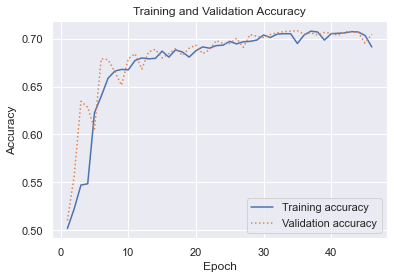

In [66]:
sns.set()
acc = fitmodel.history['accuracy']
val = fitmodel.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# D3. 
The fitness of the model, the loss was around 0.54 while the accuracy was 0.71. This tells us our model has a 54% error and was accurate 71% of the time. To prevent overfitting, the stopping criteria was implented. 

# D4.


In [67]:
#spare copy cause you don't know how to use GITHUB

# E.

# F.

# G.

# H.

# I.

# J.

# K.